# Importing Libraries

In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')


from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.model_selection import train_test_split

import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
# !pip install num2words
from num2words import num2words
# !pip install pyspellchecker
from spellchecker import SpellChecker
from nltk.stem.porter import PorterStemmer
import spacy
from nltk.stem import WordNetLemmatizer

## Import Dataset

In [2]:
train_df = pd.read_csv("C:\\Users\\sid\\Desktop\\E commerce\\train_product_data.csv")
test_df = pd.read_csv("C:\\Users\\sid\\Desktop\\E commerce\\test_data.csv")
test_result = pd.read_csv("C:\\Users\\sid\\Desktop\\E commerce\\test_results.csv")

In [3]:
print(train_df.shape)
print(test_df.shape)
print(test_result.shape)

(14999, 15)
(2534, 14)
(2534, 1)


# Dataset preparation

In [4]:
train_df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [5]:
# Check basic information about datasets
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

In [6]:
#Checking missing values
train_df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 57
discounted_price             57
image                         3
is_FK_Advantage_product       0
description                   1
product_rating                0
overall_rating                0
brand                      4710
product_specifications        6
dtype: int64

In [7]:
#Customizing the data
train_df = train_df[['description','product_category_tree']]

In [8]:
train_df.head()

,description,product_category_tree
0,Key Features of Alisha Solid Women's Cycling S...,Clothing
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear
2,Key Features of Alisha Solid Women's Cycling S...,Clothing
3,Key Features of Alisha Solid Women's Cycling S...,Clothing
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear


In [9]:
# Example description
train_df['description'].iloc[0]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

In [10]:
#count the number of missing (null) values
train_df.isnull().sum()

description              1
product_category_tree    0
dtype: int64

In [11]:
# Missing values and duplicate observations
print(pd.Series({"Number of observations with missing values": len(train_df) - len(train_df.dropna()),
                 "Number of duplicate observations": train_df.duplicated().sum()}).to_string())

Number of observations with missing values       1
Number of duplicate observations              1832


In [12]:
#count the number of missing (null) values
train_df.isnull().sum()

description              1
product_category_tree    0
dtype: int64

In [13]:
#duplicated values
train_df.duplicated().sum()

1832

In [14]:
train_df.dropna(inplace = True) # Removing records with missing values
train_df.drop_duplicates(inplace = True) # Removing duplicate values
train_df.reset_index(drop = True, inplace = True) # Resetting index

In [15]:
# Rechecking the missing values
train_df.isnull().sum()

description              0
product_category_tree    0
dtype: int64

No missing values observed

In [16]:
#Recheking the duplicated values
train_df.duplicated().sum()

0

No duplicated values observed

In [17]:
# copy the refined data to new csv file
train_df.to_csv('refined_prod_desc.csv')

In [18]:
#checking unique value in column product category tree
train_df['product_category_tree'].unique()

array(['Clothing ', 'Footwear ', 'Pens & Stationery ',
       'Bags, Wallets & Belts ', 'Home Decor & Festive Needs ',
       'Automotive ', 'Tools & Hardware ', 'Baby Care ',
       'Mobiles & Accessories ', 'Watches ', 'Toys & School Supplies ',
       'Jewellery ', 'Kitchen & Dining ', 'Computers '], dtype=object)

In [19]:
train_df['product_category_tree'].nunique()

14

In [20]:
# Manual encoding of category
category_mapping = {
    'Clothing ': 0,
    'Footwear ': 1,
    'Pens & Stationery ': 2,
    'Bags, Wallets & Belts ': 3,
    'Home Decor & Festive Needs ': 4,
    'Automotive ': 5,
    'Tools & Hardware ': 6,
    'Baby Care ': 7,
    'Mobiles & Accessories ': 8,
    'Watches ': 9,
    'Toys & School Supplies ': 10,
    'Jewellery ': 11,
    'Kitchen & Dining ': 12,
    'Computers ': 13
}

In [21]:
train_df['product_category_encoded'] = train_df['product_category_tree'].map(category_mapping)

In [22]:
train_df.head()

,description,product_category_tree,product_category_encoded
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,0
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,1
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,0
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,0
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,1


# EDA

In [23]:
train_df['description_len'] = train_df['description'].apply(lambda x: len(x.split(' ')))
train_df.head()

,description,product_category_tree,product_category_encoded,description_len
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,64
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,1,107
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,63
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,65
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,1,64


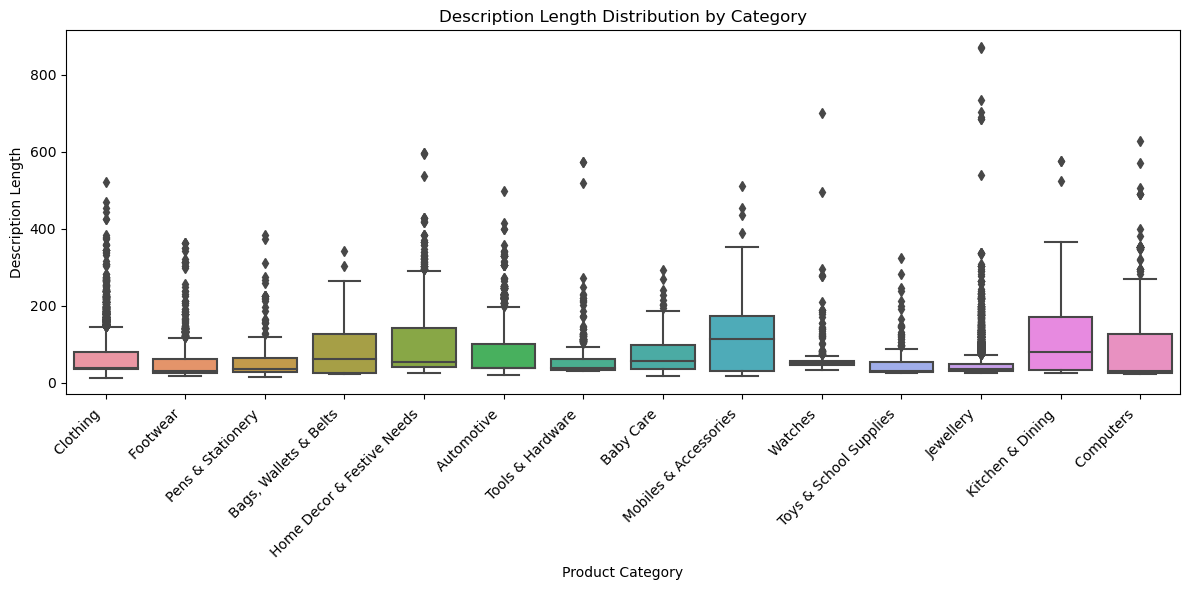

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    x='product_category_tree',
    y='description_len',
    data=train_df,
    ax=ax
)

ax.set_title('Description Length Distribution by Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Description Length')

# Rotate x-axis labels for better readability
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

fig.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Product descriptions in the “Mobiles & Accessories” category are typically the most detailed, followed by those in “Kitchens & Dining” and “Computers.” On the other hand, descriptions for items in the “Clothing,” “Watches,” and “Footwear” categories are generally shorter.

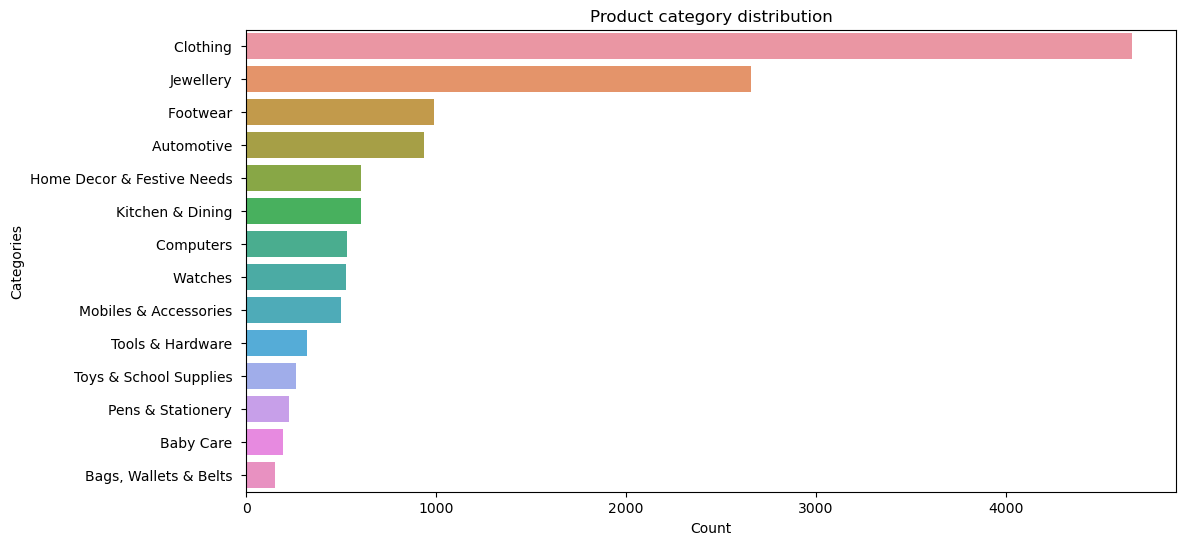

In [25]:
# Plot category distribution
plt.figure(figsize=(12, 6))
sns.countplot(y=train_df['product_category_tree'], order=train_df['product_category_tree'].value_counts().index)
plt.title('Product category distribution')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.show()

The dataset shows that “Clothing” has the most categories, followed by “Jewellery” and “Footwear.” This suggests a higher customer interest in these products, likely driven by female shoppers.

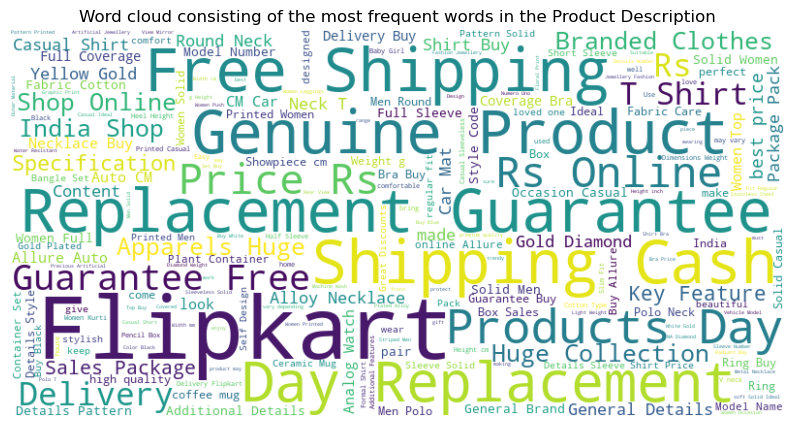

In [26]:
# Generate word cloud for product descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['description']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word cloud consisting of the most frequent words in the Product Description')
plt.axis('off')
plt.show()

# Text Normalization
<ul>
    <li>Convertion to Lowercase</li>
<li>Removal of whitespaces</li>
<li>Removal of punctuations</li>
<li>Removal of unicode characters</li>
<li>Removal of stopwords</li>
<li>Spelling correction</li>
<li>Stemming and Lemmatization</li>
<li>Removing non-alphabetic words</li>
<li>Preservation of essential parts of speech</li>
<li>Workflow processes</li>
  <li>  Implementation on product description</li>
</ul>
<p>In natural language processing, text normalization is the process of transforming text into a single canonical form. We consider a number of text normalization processes. At the end of the section, we combine selected processes into one single function and apply it on the product descriptions.</p>

In [27]:
# RegexpTokenizer
regexp = RegexpTokenizer("[\w']+")

<h4>Converting to lowercase</h4>

We convert all alphabetical characters of the tweets to lowercase so that the models do not differentiate identical words due to case-sensitivity. For example, without the normalization, Sun and sun would have been treated as two different words, which is not useful in the present context.

In [28]:
# Converting to lowercase
def convert_to_lowercase(text):
    return text.lower()

text = "This is aN UPgRAD ds HACKATHON pRoJeCT"
print("Input: {}".format(text))
print("Output: {}".format(convert_to_lowercase(text)))

Input: This is aN UPgRAD ds HACKATHON pRoJeCT
Output: this is an upgrad ds hackathon project


<h4>Removal of whitespaces</h4>

We remove the unnecessary empty spaces from the description of the observations.

In [29]:
# Removing whitespaces
def remove_whitespace(text):
    return text.strip()

text = " \t This is a string \t "
print(f"Input: {text}")
print(f"Output: {remove_whitespace(text)}")

Input:  	 This is a string 	 
Output: This is a string


<h4>Removal of punctuations</h4>

In [30]:
# Removing punctuations
def remove_punctuation(text):
    punct_str = string.punctuation
    punct_str = punct_str.replace("'", "")  # discarding apostrophe from the string to keep the contractions intact
    return text.translate(str.maketrans("", "", punct_str))

text = "Here's [an] example? {of} &a string. with.? (punctuations)!!!!"
print(f"Input: {text}")
print(f"Output: {remove_punctuation(text)}")

Input: Here's [an] example? {of} &a string. with.? (punctuations)!!!!
Output: Here's an example of a string with punctuations


<h4>Removal of unicode characters</h4>

In [31]:
# Removing html tags
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

text = '<a href = "https://www.xyz.com/abc/qwert"> Ecommerce Product Categorization</a>'
print(f"Input: {text}")
print(f"Output: {remove_html(text)}")

Input: <a href = "https://www.xyz.com/abc/qwert"> Ecommerce Product Categorization</a>
Output:  Ecommerce Product Categorization


In [32]:
# Removing emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

text = "This innovative hd printing technique results in durable and spectacular looking prints 😊"
print(f"Input: {text}")
print(f"Output: {remove_emoji(text)}")

Input: This innovative hd printing technique results in durable and spectacular looking prints 😊
Output: This innovative hd printing technique results in durable and spectacular looking prints 


In [33]:
# Removing other unicode characters
def remove_http(text):
    http = "https?://\S+|www\.\S+" # matching strings beginning with http (but not just "http")
    pattern = r"({})".format(http) # creating pattern
    return re.sub(pattern, "", text)

text = "It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols"
print(f"Input: {text}")
print(f"Output: {remove_http(text)}")

Input: It's a function that removes links starting with http: or https such as https://en.wikipedia.org/wiki/Unicode_symbols
Output: It's a function that removes links starting with http: or https such as 


<h4>Removal of stopwords</h4>

In [34]:
# Define various categories of stopwords
stopwords_dict = {
    "standard": stopwords.words("english"),
    "alphabets": list("abcdefghijklmnopqrstuvwxyz"),
    "prepositions": [
        "about", "above", "across", "after", "against", "among", "around", "at", "before", 
        "behind", "below", "beside", "between", "by", "down", "during", "for", "from", 
        "in", "inside", "into", "near", "of", "off", "on", "out", "over", "through", 
        "to", "toward", "under", "up", "with"
    ],
    "prepositions_less_common": [
        "aboard", "along", "amid", "as", "beneath", "beyond", "but", "concerning", 
        "considering", "despite", "except", "following", "like", "minus", "onto", 
        "outside", "per", "plus", "regarding", "round", "since", "than", "till", 
        "underneath", "unlike", "until", "upon", "versus", "via", "within", "without"
    ],
    "coordinating_conjunctions": [
        "and", "but", "for", "nor", "or", "so", "yet"
    ],
    "correlative_conjunctions": [
        "both", "and", "either", "or", "neither", "nor", "not", "only", "but", "whether", "or"
    ],
    "subordinating_conjunctions": [
        "after", "although", "as", "as if", "as long as", "as much as", "as soon as", 
        "as though", "because", "before", "by the time", "even if", "even though", "if", 
        "in order that", "in case", "in the event that", "lest", "now that", "once", 
        "only", "only if", "provided that", "since", "so", "supposing", "that", 
        "than", "though", "till", "unless", "until", "when", "whenever", "where", 
        "whereas", "wherever", "whether or not", "while"
    ],
    "other_words": [
        "ã", "å", "ì", "û", "ûªm", "ûó", "ûò", "ìñ", "ûªre", "ûªve", "ûª", "ûªs", 
        "ûówe"
    ],
    "additional_stopwords": [
        "among", "get", "onto", "shall", "thrice", "thus", "twice", "unto", "us", 
        "would"
    ],
    "ecommerce_words": [
        "shop", "shops", "shopping", "buy", "genuine", "product", "store", "stores", 
        "day", "replacement", "good", "description", "purchase", "purchases", "checkout", 
        "cart", "details", "detail", "discount", "discounts", "offer", "offers", 
        "specification", "deal", "deals", "sale", "sales", "item", "items", "voucher", 
        "vouchers", "coupon", "coupons", "promo", "promos", "promotion", "promotions", 
        "buying", "selling", "seller", "sellers", "buyer", "buyers", "payment", 
        "payments", "checkout", "free", "order", "orders", "available", "return", 
        "returns", "exchange", "exchanges", "refund", "refunds", "customer", "customers", 
        "service", "services", "support", "feedback", "review", "reviews", "rating", 
        "ratings", "online", "offline", "delivery", "shipping", "shipped", "ship", 
        "track", "tracking", "cash", "payment", "prices", "price", "rs.", "rs", 
        "select", "selected", "transaction", "transactions", "secure", "key", 
        "feature", "features", "guarantee", "guaranteed", "fast", "quick", 
        "easy", "convenient", "reliable", "trustworthy", "safe", "secure", 
        "doorstep", "discounted", "affordable", "cheap", "low", "high", "best", 
        "popular", "top", "quality", "brand", "brands", "stock", "new", "latest", 
        "trending", "hot", "exclusive"
    ],
    "ecommerce_platforms": [
        "flipkart", "amazon", "mintra", "snapdeal"
    ]
}

# Combine all stopwords into a single list
all_stopwords = sum(stopwords_dict.values(), [])

print(all_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# Make sure to download the stopwords dataset
nltk.download('stopwords')

# Define the stopwords
allstops = set(stopwords.words('english'))

# Define the tokenizer
regexp = RegexpTokenizer(r'\w+')

def remove_stopwords(text):
    return " ".join([word for word in regexp.tokenize(text) if word.lower() not in allstops])

# Example usage
text = "shop the latest collection of premium quality fashion accessories. get discounts on selected items. free shipping on orders over rs.50. limited stock available."
print(f"Input: {text}")
print(f"Output: {remove_stopwords(text)}")


Input: shop the latest collection of premium quality fashion accessories. get discounts on selected items. free shipping on orders over rs.50. limited stock available.
Output: shop latest collection premium quality fashion accessories get discounts selected items free shipping orders rs 50 limited stock available


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h4>Spelling correction</h4>

In [36]:
spell = SpellChecker()

def pyspellchecker(text):
    word_list = regexp.tokenize(text)
    word_list_corrected = []
    for word in word_list:
        if word in spell.unknown(word_list):
            word_corrected = spell.correction(word)
            if word_corrected == None:
                word_list_corrected.append(word)
            else:
                word_list_corrected.append(word_corrected)
        else:
            word_list_corrected.append(word)
    text_corrected = " ".join(word_list_corrected)
    return text_corrected

text = "womon sampoo for limitad offar"
print(f"Input: {text}")
print(f"Output: {pyspellchecker(text)}")

Input: womon sampoo for limitad offar
Output: woman shampoo for limited offer


<h4>Stemming and Lemmatization</h4>

Stemming involves reducing words to their root form or base stem. This process groups related words under the same stem, even if the stem isn’t a valid dictionary word. For instance, “introducing,” “introduced,” and “introduction” all reduce to “introduce.” However, this method often results in stems that aren’t actual words.

In [37]:
# Stemming
stemmer = PorterStemmer()
def text_stemmer(text):
    text_stem = " ".join([stemmer.stem(word) for word in regexp.tokenize(text)])
    return text_stem

text = "Introducing lemmatization as an improvement over stemming"
print(f"Input: {text}")
print(f"Output: {text_stemmer(text)}")

Input: Introducing lemmatization as an improvement over stemming
Output: introduc lemmat as an improv over stem


In [38]:
# Lemmatization
spacy_lemmatizer = spacy.load("en_core_web_sm", disable = ['parser', 'ner'])
#lemmatizer = WordNetLemmatizer()

def text_lemmatizer(text):
    text_spacy = " ".join([token.lemma_ for token in spacy_lemmatizer(text)])
    #text_wordnet = " ".join([lemmatizer.lemmatize(word) for word in word_tokenize(text)]) # regexp.tokenize(text)
    return text_spacy
    #return text_wordnet

text = "Introducing lemmatization as an improvement over stemming"
print("Input: {}".format(text))
print("Output: {}".format(text_lemmatizer(text)))

Input: Introducing lemmatization as an improvement over stemming
Output: introduce lemmatization as an improvement over stem


<h4>Removing non-alphabetic words</h4>

In [39]:
# Discarding non-alphabetic words
def discard_non_alpha(text):
    word_list_non_alpha = [word for word in regexp.tokenize(text) if word.isalpha()]
    text_non_alpha = " ".join(word_list_non_alpha)
    return text_non_alpha

text = "It is a watch of Rs.1000"
print(f"Input: {text}")
print(f"Output: {discard_non_alpha(text)}")

Input: It is a watch of Rs.1000
Output: It is a watch of Rs


<h4>Preservation of essential parts of speech</h4>

In [40]:
def keep_pos(text):
    tokens = regexp.tokenize(text)
    tokens_tagged = nltk.pos_tag(tokens)
    #keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW']
    keep_tags = ['NN', 'NNS', 'NNP', 'NNPS', 'FW', 'PRP', 'PRPS', 'RB', 'RBR', 'RBS', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WPS', 'WRB']
    keep_words = [x[0] for x in tokens_tagged if x[1] in keep_tags]
    return " ".join(keep_words)

text = "He arrived at seven o'clock on Wednesday evening"
print("Input: {}".format(text))
tokens = regexp.tokenize(text)
print("Tokens: {}".format(tokens))
tokens_tagged = nltk.pos_tag(tokens)
print("Tagged Tokens: {}".format(tokens_tagged))
print("Output: {}".format(keep_pos(text)))

Input: He arrived at seven o'clock on Wednesday evening
Tokens: ['He', 'arrived', 'at', 'seven', 'o', 'clock', 'on', 'Wednesday', 'evening']
Tagged Tokens: [('He', 'PRP'), ('arrived', 'VBD'), ('at', 'IN'), ('seven', 'CD'), ('o', 'JJ'), ('clock', 'NN'), ('on', 'IN'), ('Wednesday', 'NNP'), ('evening', 'NN')]
Output: He arrived clock Wednesday evening


In [41]:
# Example product description
product_description = "This stylish red dress is perfect for parties and special occasions. Made with high-quality fabric, it features a flattering fit and flare silhouette. Pair it with heels and statement jewelry for a stunning look."

# Apply the keep_pos function to the product description
filtered_description = keep_pos(product_description)

print(f"Input: {product_description}")
print(f"Output: {filtered_description}")

Input: This stylish red dress is perfect for parties and special occasions. Made with high-quality fabric, it features a flattering fit and flare silhouette. Pair it with heels and statement jewelry for a stunning look.
Output: dress is parties occasions Made quality fabric it features fit flare silhouette Pair it heels statement jewelry look


### Workflow processes

In [42]:
def text_normalizer(text):
    text = convert_to_lowercase(text)
    text = remove_whitespace(text)
    text = re.sub('\n' , '', text) # converting text to one line
    text = re.sub(r'\.com\b', '', text) # Remove ".com"
    text = re.sub('\[.*?\]', '', text) # removing square brackets
    text = remove_http(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = text_lemmatizer(text) # text = text_stemmer(text)
    text = discard_non_alpha(text)
    text = keep_pos(text)
    text = remove_stopwords(text)
    return text

In [43]:
text = " We'll (combine) women's [all] {functions}  into 1 - /SINGLE FUNCTION 🙂 & apply on watch T-shirt plastic pan @product #descriptions https://en.wikipedia.org/wiki/Text_normalization free offer on flip-kart.com Rs 100"
print("Input: {}".format(text))
print("Output: {}".format(text_normalizer(text)))

Input:  We'll (combine) women's [all] {functions}  into 1 - /SINGLE FUNCTION 🙂 & apply on watch T-shirt plastic pan @product #descriptions https://en.wikipedia.org/wiki/Text_normalization free offer on flip-kart.com Rs 100
Output: combine woman function function apply watch tshirt plastic pan product description offer flipkart r


<h4>Implementation on product description</h4>

In [44]:
train_df['normalized_description'] = train_df['description'].apply(text_normalizer)
train_df[['description','normalized_description']]

,description,normalized_description
0,Key Features of Alisha Solid Women's Cycling S...,feature alisha woman cycling cotton lycra navy...
1,Key Features of AW Bellies Sandals Wedges Heel...,feature aw belly wedge heel casualsaw belly pr...
2,Key Features of Alisha Solid Women's Cycling S...,feature alisha woman cycling cotton lycra reds...
3,Key Features of Alisha Solid Women's Cycling S...,feature alisha woman cycling cotton lycra reds...
4,"Key Features of dilli bazaaar Bellies, Corpora...",feature dilli bazaaar belly material fabric oc...
...,...,...
13161,Thelostpuppy Book Cover for Apple iPad Air 2 (...,book cover apple ipad air price rs design prot...
13162,Babes Brass Cuff (Pack of 2)\n ...,babes brass pack price rs babe brand present g...
13163,Kenway Retail Brass Copper Cuff\n ...,kenway brass copper cuff price rs sultry swagg...
13164,Kenway Retail Brass Copper Cuff\n ...,kenway brass copper cuff price rs swagger swag...


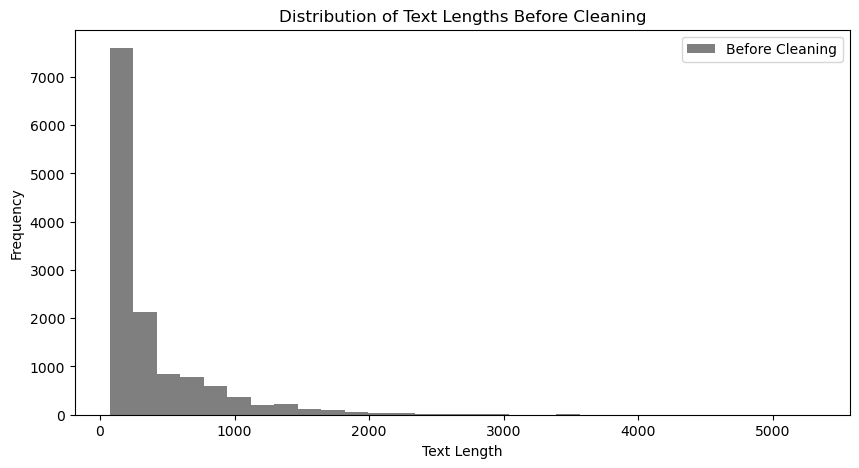

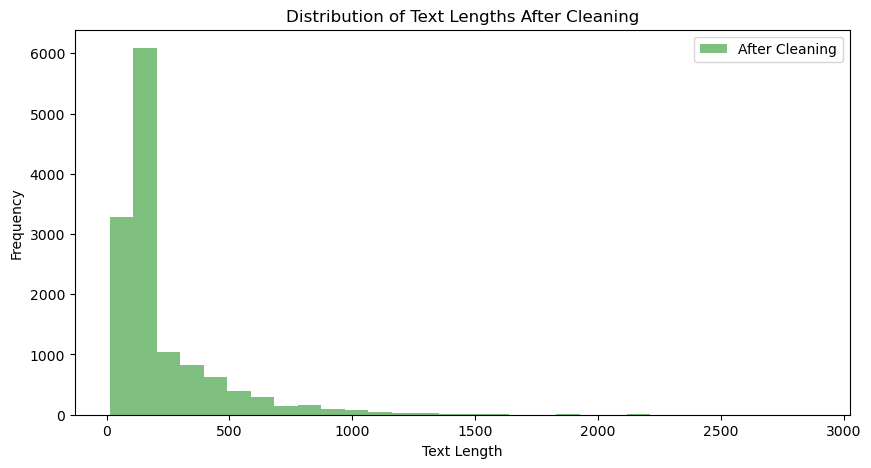

In [45]:
# Before cleaning
plt.figure(figsize=(10, 5))
plt.hist(train_df['description'].str.len(), bins=30, color='black', alpha=0.5, label='Before Cleaning')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths Before Cleaning')
plt.legend()
plt.show()

# After cleaning
plt.figure(figsize=(10, 5))
plt.hist(train_df['normalized_description'].str.len(), bins=30, color='green', alpha=0.5, label='After Cleaning')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths After Cleaning')
plt.legend()
plt.show()

In [46]:
# Calculating average text lengths before and after cleaning
avg_text_length_before = train_df['description'].str.len().mean()
avg_text_length_after = train_df['normalized_description'].str.len().mean()

# Calculating the percentage reduction in text length
percentage_reduction = ((avg_text_length_before - avg_text_length_after) / avg_text_length_before) * 100

print("Percentage reduction in text length after cleaning: {:.2f}%".format(percentage_reduction))

Percentage reduction in text length after cleaning: 45.43%


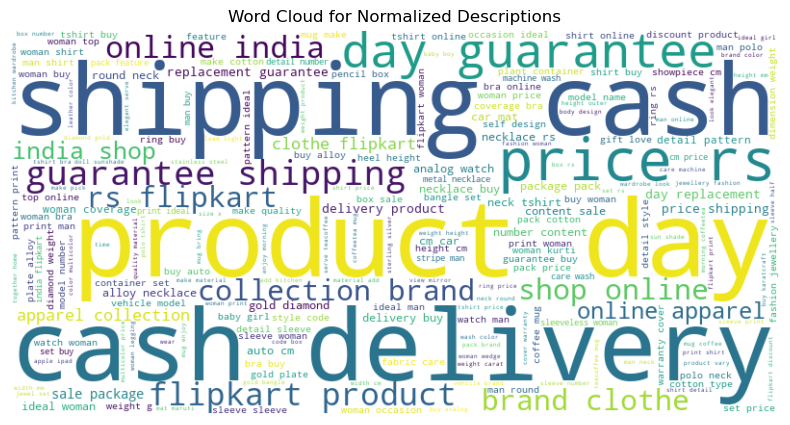

In [47]:
text = " ".join(description for description in train_df['normalized_description'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Normalized Descriptions')
plt.show()

# Train validation Test split

In [48]:
train_df.head()

,description,product_category_tree,product_category_encoded,description_len,normalized_description
0,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,64,feature alisha woman cycling cotton lycra navy...
1,Key Features of AW Bellies Sandals Wedges Heel...,Footwear,1,107,feature aw belly wedge heel casualsaw belly pr...
2,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,63,feature alisha woman cycling cotton lycra reds...
3,Key Features of Alisha Solid Women's Cycling S...,Clothing,0,65,feature alisha woman cycling cotton lycra reds...
4,"Key Features of dilli bazaaar Bellies, Corpora...",Footwear,1,64,feature dilli bazaaar belly material fabric oc...


In [49]:
X = train_df['normalized_description']
y = train_df['product_category_encoded']

# Train-test split 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
print("Training data: " ,len(X_train), len(y_train))
print("Validation data: ",len(X_val), len(y_val))

Training data:  10532 10532
Validation data:  2634 2634


<h4>Test data setup</h4>

In [50]:
test_df = pd.read_csv("C:\\Users\\sid\\Desktop\\E commerce\\test_data.csv")

In [51]:
print("Testing data without label: ",test_df.shape)

Testing data without label:  (2534, 14)


In [52]:
X_test = test_df['description'].apply(text_normalizer)

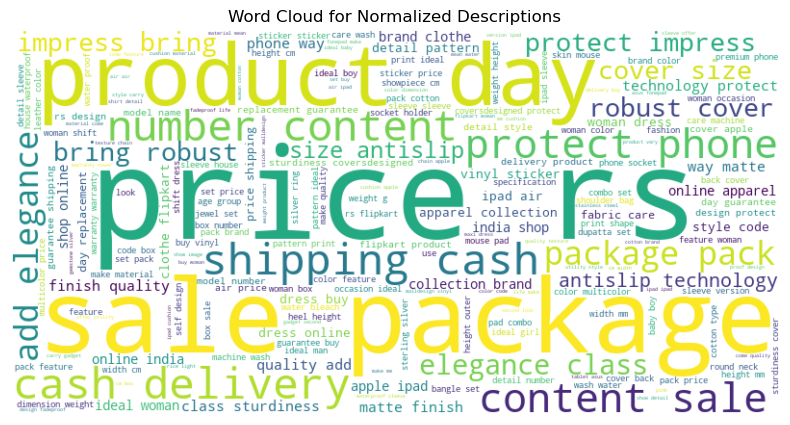

In [53]:
from wordcloud import WordCloud

text = " ".join(description for description in X_test)

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud for Normalized Descriptions')
plt.show()

# TF-IDF Model

<h4>Text vectorization</h4>

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# Vectorization using TF-IDF
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train)
X_val_tfidf = TfidfVec.transform(X_val)
X_test_tfidf = TfidfVec.transform(X_test)

In [56]:
# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

<h4>TF-IDF model training</h4>

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [58]:
# Classifiers
names = [
    "MultinomialNB",
    "KNN Classifier",
    "Decision Tree",
    "Linear SVM",
    "Random Forest",
    "SGD Classifier",
    "Ridge Classifier",
    "XGBoost",
    "AdaBoost",
]

models = [
    MultinomialNB(),
    KNeighborsClassifier(n_neighbors = 149, n_jobs = -1),
    DecisionTreeClassifier(),
    svm.SVC(kernel = 'linear'),
    RandomForestClassifier(n_estimators = 100),
    SGDClassifier(loss = 'hinge'),
    RidgeClassifier(),
    XGBClassifier(),
    AdaBoostClassifier()
]

In [59]:
# Function to return summary of baseline models
def score(X_train, y_train, X_val, y_val, names = names, models = models):
    score_df, score_train, score_val = pd.DataFrame(), [], []
    for model in models:
        model.fit(X_train, y_train)
        y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
        score_train.append(accuracy_score(y_train, y_train_pred))
        score_val.append(accuracy_score(y_val, y_val_pred))
    
    score_df["Classifier"], score_df["Training accuracy"], score_df["Validation accuracy"] = names, score_train, score_val
    score_df.sort_values(by = 'Validation accuracy', ascending = False, inplace = True)
    return score_df

In [60]:
# Summary of baseline models
score(X_train_tfidf, y_train, X_val_tfidf, y_val, names = names, models = models)

,Classifier,Training accuracy,Validation accuracy
5,SGD Classifier,0.991265,0.981017
3,Linear SVM,0.990695,0.979499
6,Ridge Classifier,0.993069,0.979119
7,XGBoost,0.998861,0.971526
4,Random Forest,0.998956,0.965072
2,Decision Tree,0.998956,0.949506
0,MultinomialNB,0.915496,0.896355
1,KNN Classifier,0.882643,0.881169
8,AdaBoost,0.501709,0.503797


<h4>Hyperparameter Tuning</h4>

In [61]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='accuracy', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid.
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters.
    The combination with the highest accuracy for each class is selected as the default scoring metric.
    The function returns the classifier with the optimal hyperparameters.
    '''

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_

    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [62]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score,roc_auc_score,confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [63]:
# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10, 100],        # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'], # Solvers
    'class_weight':[None, 'balanced']                 # Whether to normalize the input features
}

In [64]:
best_ridge, best_hyperparams = tune_clf_hyperparameters(RidgeClassifier(), param_grid, X_train_tfidf, y_train)
print('Optimal Hyperparameters: \n',  best_hyperparams)

Optimal Hyperparameters: 
 {'alpha': 1.0, 'class_weight': 'balanced', 'solver': 'auto'}


# Model evaluation

In [65]:
# Reverse the category mapping to map numeric labels back to category names
reverse_category_mapping = {v: k.strip() for k, v in category_mapping.items()}

def map_labels(y, reverse_mapping):
    return [reverse_mapping[label] for label in y]

def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Map numeric labels to category names
    y_train_mapped = map_labels(y_train, reverse_category_mapping)
    y_test_mapped = map_labels(y_test, reverse_category_mapping)

    # Predict using the model
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Map numeric predictions to category names
    y_train_pred_mapped = map_labels(y_train_pred, reverse_category_mapping)
    y_test_pred_mapped = map_labels(y_test_pred, reverse_category_mapping)

    # Evaluate the model on the train data
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train_mapped, y_train_pred_mapped))

    # Evaluate the model on the test data
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test_mapped, y_test_pred_mapped))

    # Generate confusion matrix
    cm = confusion_matrix(y_test_mapped, y_test_pred_mapped, labels=list(reverse_category_mapping.values()))

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(14, 14))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=list(reverse_category_mapping.values()), 
                yticklabels=list(reverse_category_mapping.values()))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.show()


	  Classification report for training set
-------------------------------------------------------
                            precision    recall  f1-score   support

                Automotive       1.00      1.00      1.00       748
                 Baby Care       0.84      1.00      0.91       156
     Bags, Wallets & Belts       0.97      1.00      0.98       122
                  Clothing       1.00      0.99      0.99      3730
                 Computers       0.99      0.99      0.99       423
                  Footwear       0.99      0.99      0.99       790
Home Decor & Festive Needs       1.00      1.00      1.00       485
                 Jewellery       1.00      1.00      1.00      2126
          Kitchen & Dining       1.00      1.00      1.00       485
     Mobiles & Accessories       0.99      1.00      1.00       401
         Pens & Stationery       0.99      0.92      0.95       179
          Tools & Hardware       1.00      1.00      1.00       257
    Toys & Schoo

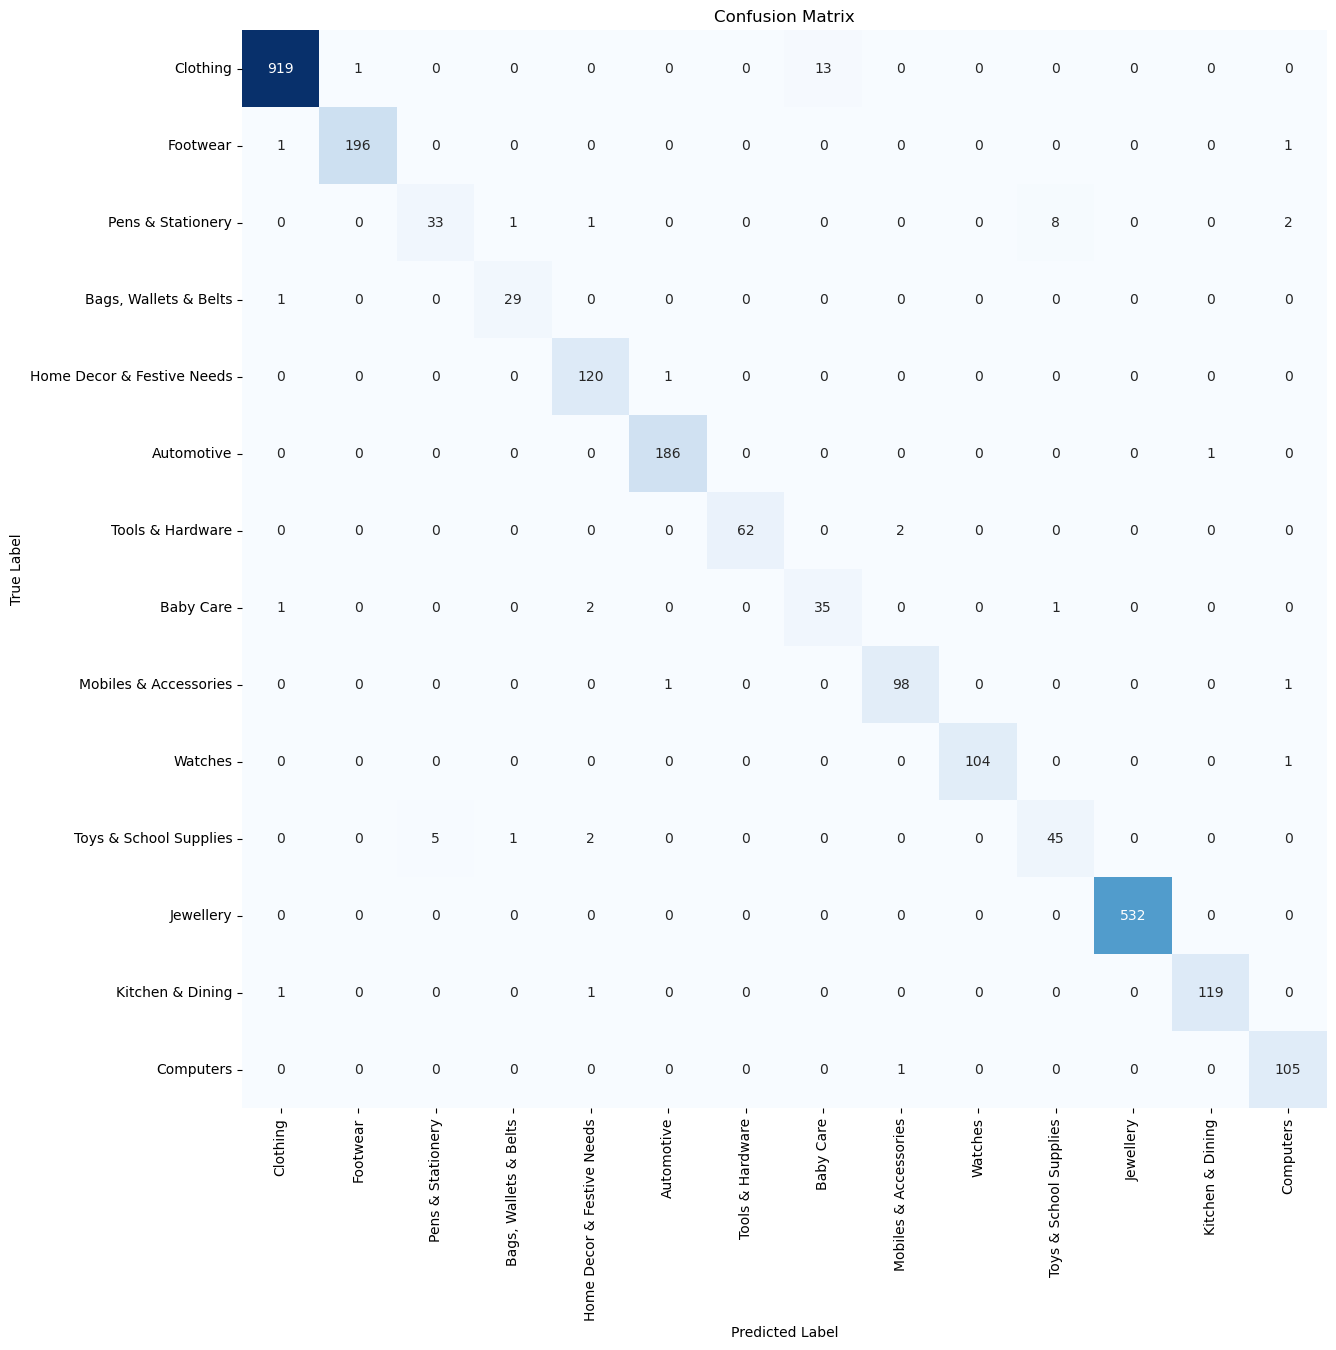

In [66]:
evaluate_model(best_ridge, X_train_tfidf, y_train, X_val_tfidf, y_val)

# Prediction

In [67]:
test_result = pd.read_csv("C:\\Users\\sid\\Desktop\\E commerce\\test_results.csv")
test_result.shape

(2534, 1)

In [68]:
y_test_pred = best_ridge.predict(X_test_tfidf)

In [69]:
test_result.isnull().sum()

product_category_tree    0
dtype: int64

In [70]:
type(y_test_pred)

numpy.ndarray

In [71]:
category_mapping = {
    'Clothing ': 0,
    'Footwear ': 1,
    'Pens & Stationery ': 2,
    'Bags, Wallets & Belts ': 3,
    'Home Decor & Festive Needs ': 4,
    'Automotive ': 5,
    'Tools & Hardware ': 6,
    'Baby Care ': 7,
    'Mobiles & Accessories ': 8,
    'Watches ': 9,
    'Toys & School Supplies ': 10,
    'Jewellery ': 11,
    'Kitchen & Dining ': 12,
    'Computers ': 13
}

y_test = test_result['product_category_tree'].map(category_mapping)

In [72]:
y_test = np.array(y_test)

In [73]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8346


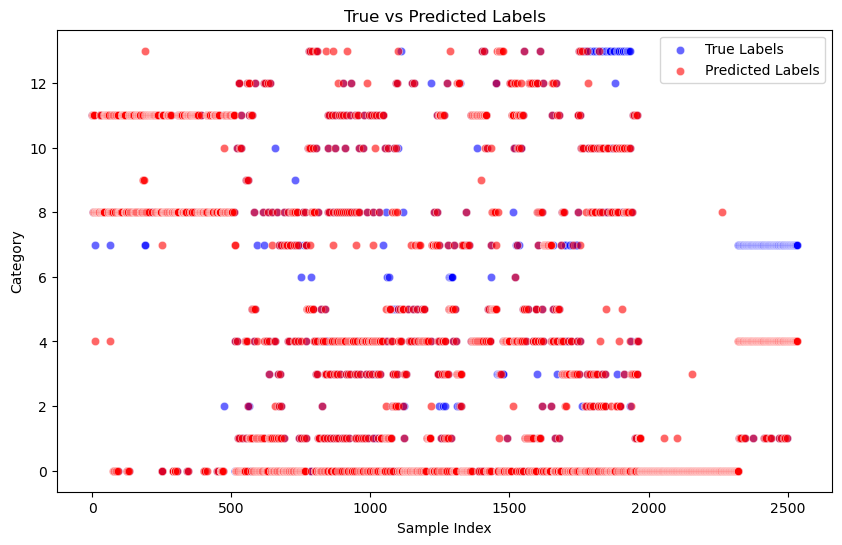

In [74]:
data = pd.DataFrame({
    'Index': range(len(y_test)),
    'True Labels': y_test,
    'Predicted Labels': y_test_pred
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Index', y='True Labels', color='blue', label='True Labels', alpha=0.6)
sns.scatterplot(data=data, x='Index', y='Predicted Labels', color='red', label='Predicted Labels', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Category')
plt.title('True vs Predicted Labels')
plt.legend()
plt.show()


The model achieved a high accuracy of 83.46%, indicating strong performance in predicting the categories of the given samples